In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-26-04-07_BanditNonStaticGlobal_/BanditNonStaticGlobal.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
0,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,49.97,0.2663,0
1,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,50.75,0.1605,1
2,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,49.79,0.1492,2
3,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,99.87,50.18,0.1284,3
4,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,99.45,49.88,0.1459,4


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCB-ADWIN-0.1',
 'CUCBm',
 'Exp3.M',
 'Exp3.M-ADWIN-0.1',
 'IMP-TS',
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-KLUCB',
 'MP-KLUCB-ADWIN-0.1',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0',
 'OR',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [6]:
masterdata.shape

(3100000, 8)

In [7]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

,,gain,k,reward/arm
bandit,scalingstrategy,,,
CUCB,KL-1-100-0.6,39.969405,68.937980,0.582002
CUCB-ADWIN-0.1,KL-1-100-0.6,33.116111,55.161469,0.595553
CUCBm,KL-1-100-0.6,39.985507,68.963407,0.582014
Exp3.M,KL-1-100-0.6,19.358668,30.082371,0.605301
Exp3.M-ADWIN-0.1,KL-1-100-0.6,14.589932,24.490176,0.523366
IMP-TS,KL-1-100-0.6,39.993718,68.980048,0.582003
MP-DTS; g=0.7,KL-1-100-0.6,35.652671,61.404709,0.573901
MP-DTS; g=0.8,KL-1-100-0.6,37.152337,64.288340,0.579181
MP-DTS; g=0.9,KL-1-100-0.6,38.121455,65.931053,0.580373


In [8]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06
mean,6.021655e+01,3.487875e+01,6.700632e-01,4.999950e+04,5.721602e-01
std,2.593874e+01,1.580369e+01,1.073665e+00,2.886752e+04,8.975903e-02
min,1.100000e+00,2.400000e-01,1.340000e-02,0.000000e+00,7.294833e-02
25%,5.500000e+01,2.721000e+01,2.038000e-01,2.499975e+04,5.125150e-01
50%,6.650000e+01,4.200000e+01,2.906000e-01,4.999950e+04,5.971736e-01
75%,7.997000e+01,4.783000e+01,5.959000e-01,7.499925e+04,6.062969e-01
max,1.000000e+02,5.122000e+01,1.392997e+02,9.999900e+04,9.155273e-01


In [9]:
masterdata['dataset'].unique()

array(['GlobalGenerator-100'], dtype=object)

In [10]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [11]:
styledictionary = {
    'CUCB': {'marker': 's', 'color': husl5[0]},
    'CUCB-ADWIN-0.1': {'marker': '^', 'color': husl5[0]},
    
    'Exp3.M' : {'marker': 'o', 'color': oranges5[1]},
    'Exp3.M-ADWIN-0.1' : {'marker': '^', 'color': oranges5[1]},
    
    'MP-DTS; g=0.7': {'marker': 'X', 'color': blues5[0]},
    'MP-DTS; g=0.8': {'marker': 'X', 'color': blues5[1]},
    'MP-DTS; g=0.9': {'marker': 'X', 'color': blues5[2]},
    'MP-DTS; g=0.99': {'marker': 'X', 'color': blues5[3]},
    
    'MP-EG; e=0.7': {'marker': 'v', 'color': reds5[0]},
    'MP-EG; e=0.8': {'marker': 'v', 'color': reds5[1]},
    'MP-EG; e=0.9': {'marker': 'v', 'color': reds5[2]},
    'MP-EG; e=0.99': {'marker': 'v', 'color': reds5[3]},
    
    'MP-SWUCB; w=50': {'marker': 'h', 'color': greys5[0]},
    'MP-SWUCB; w=100': {'marker': 'h', 'color': greys5[1]},
    'MP-SWUCB; w=500': {'marker': 'h', 'color': greys5[2]},
    'MP-SWUCB; w=1000': {'marker': 'h', 'color': greys5[3]},
    
    'MP-KLUCB': {'marker': 's', 'color': purples5[0]},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': purples5[1]},
    
    'MP-TS': {'marker': 'd', 'color': husl6[0]},
    'MP-TS-ADWIN-0.001': {'marker': '^', 'color': husl6[1]},
    'MP-TS-ADWIN-0.01': {'marker': '^', 'color': husl6[2]},
    'MP-TS-ADWIN-0.1': {'marker': '^', 'color': husl6[3]},
    'MP-TS-ADWIN-0.3': {'marker': '^', 'color': husl6[4]},
    'MP-TS-ADWIN-0.5': {'marker': '^', 'color': husl6[5]},
    'MP-TS-ADWIN-1.0': {'marker': '^', 'color': husl6[6]},
    
    'OD': {'marker': '+', 'color': husl5[2]},
    'OD-ADWIN-0.1': {'marker': '^', 'color': husl5[2]},
    'OR': {'marker': '+', 'color': husl5[3]},
    'OR-ADWIN-0.1': {'marker': '^', 'color': husl5[3]},
    'OSeq-ADWIN-0.1': {'marker': '+', 'color': husl5[4]},
    'OS': {'marker': '+', 'color': blues5[4]},
    'OS-ADWIN-0.1': {'marker': '^', 'color': blues5[4]},
    'ScalingOracle(Dynamic)': {'marker': '+', 'color': reds5[4]},
    'ScalingOracle(Static)': {'marker': '+', 'color': purples5[4]}
}

In [12]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.6'], dtype=object)

In [13]:
delta = 0.6
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [14]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration', 'reward/arm'],
      dtype='object')

In [15]:
data.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration,reward/arm
0,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,49.97,0.2663,0,0.499700
1,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,50.75,0.1605,1,0.507500
2,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,100.00,49.79,0.1492,2,0.497900
3,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,99.87,50.18,0.1284,3,0.502453
4,MP-EG; e=0.7,GlobalGenerator-100,KL-1-100-0.6,99.45,49.88,0.1459,4,0.501559


In [16]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.582002,0.103401,0.384810,0.468033,0.601451,0.685079,0.743214
CUCB-ADWIN-0.1,100000.0,0.595553,0.016033,0.369704,0.592607,0.599522,0.603859,0.895833
CUCBm,100000.0,0.582014,0.103404,0.384684,0.468032,0.601476,0.685079,0.743214
Exp3.M,100000.0,0.605301,0.106120,0.368421,0.531206,0.565664,0.697780,0.873009
Exp3.M-ADWIN-0.1,100000.0,0.523366,0.081529,0.238462,0.454545,0.540851,0.599308,0.794118
IMP-TS,100000.0,0.582003,0.103435,0.384547,0.468009,0.601501,0.685077,0.742857
MP-DTS; g=0.7,100000.0,0.573901,0.099747,0.384131,0.455806,0.602157,0.669064,0.822832
MP-DTS; g=0.8,100000.0,0.579181,0.102147,0.385949,0.463186,0.602191,0.679892,0.731051
MP-DTS; g=0.9,100000.0,0.580373,0.102766,0.384675,0.464753,0.602260,0.682123,0.735830


In [17]:
pullref = np.concatenate([np.full(33333,80), np.full(33333,20), np.full(33334,80)])

In [18]:
n = 100000
steps = np.array([((x+1)*n)/(3)for x in range(2)])
stepstates = [1,2/3,1]

In [19]:
stepstates

[1, 0.6666666666666666, 1]

In [20]:
top = 0.9966666666666667 #0.9975 #0.995
low = 0.5016666666666666 # 0.5025 # 0.5
expected_gains = []
for stepstate in stepstates: 
    expected_gains = expected_gains + [np.linspace(top*stepstate,low*stepstate,9901)]

In [21]:
expected_gains

[array([ 0.99666667,  0.99661667,  0.99656667, ...,  0.50176667,
         0.50171667,  0.50166667]),
 array([ 0.66444444,  0.66441111,  0.66437778, ...,  0.33451111,
         0.33447778,  0.33444444]),
 array([ 0.99666667,  0.99661667,  0.99656667, ...,  0.50176667,
         0.50171667,  0.50166667])]

In [22]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [23]:
prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
    
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN",
    'MP-DTS; g=0.7': "S-DTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-DTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-DTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-DTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN',
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

In [24]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "CUCB": "S-CUCB",
    "CUCB-ADWIN-0.1": "S-CUCB-ADWIN",
    "Exp3.M": "S-Exp3.M",
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCB-ADWIN-0.1': "S-KL-UCB-ADWIN",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
}

styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


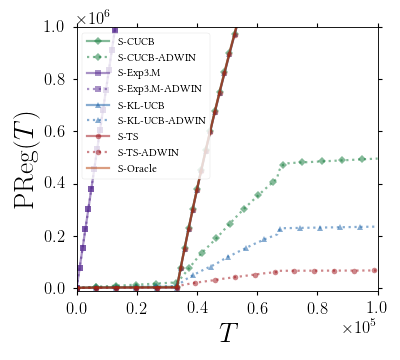

CUCB : 2161849.63
CUCB-ADWIN-0.1 : 495683.48
Exp3.M : 3868369.69
Exp3.M-ADWIN-0.1 : 3555289.42
MP-KLUCB : 2159070.07
MP-KLUCB-ADWIN-0.1 : 234980.58
MP-TS : 2159342.03
MP-TS-ADWIN-0.1 : 66867.38
OR : 5836418.87
OS : 2159778.49


In [25]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("global_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


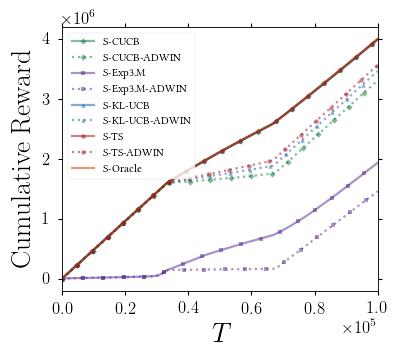

CUCB : 3996940.53
CUCB-ADWIN-0.1 : 3311611.11
Exp3.M : 1935866.8
Exp3.M-ADWIN-0.1 : 1458993.22
MP-KLUCB : 3998965.16
MP-KLUCB-ADWIN-0.1 : 3469162.8
MP-TS : 3999314.15
MP-TS-ADWIN-0.1 : 3569303.3
OR : 73894.01
OS : 4005706.12


In [26]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative~Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("global_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


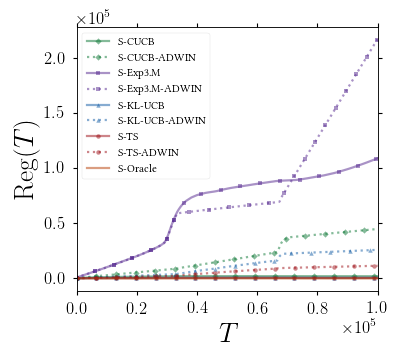

CUCB : 2025.25080972
CUCB-ADWIN-0.1 : 44941.759873
Exp3.M : 109192.901693
Exp3.M-ADWIN-0.1 : 217660.472732
MP-KLUCB : 636.266207777
MP-KLUCB-ADWIN-0.1 : 25973.7888234
MP-TS : 467.906125722
MP-TS-ADWIN-0.1 : 11515.3654011
OR : 70654.3880891
OS : 16.0908572775


In [27]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("global_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


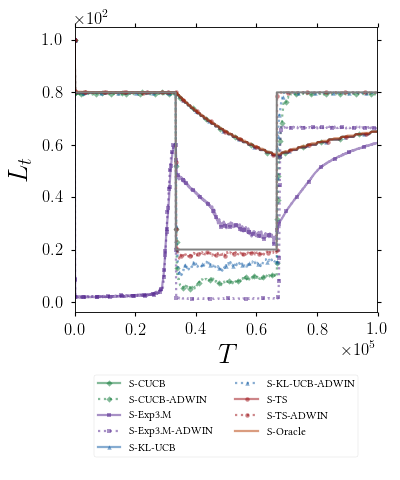

CUCB : 68.93798009999986
CUCB-ADWIN-0.1 : 55.16146940000107
Exp3.M : 30.082371299999625
Exp3.M-ADWIN-0.1 : 24.49017619999989
MP-KLUCB : 68.96907730000012
MP-KLUCB-ADWIN-0.1 : 57.77946759999496
MP-TS : 68.97866590000085
MP-TS-ADWIN-0.1 : 59.46163400001416
OR : 1.641656500000158
OS : 69.1721269000019


In [28]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.2))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig("global_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


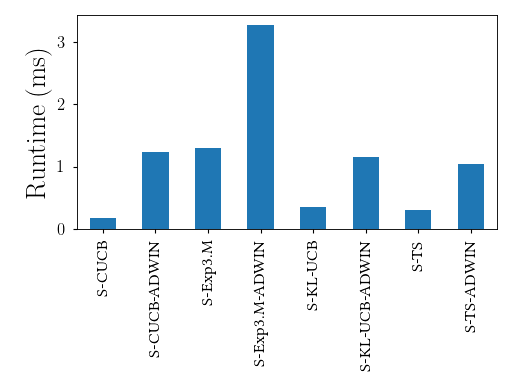

In [29]:
%matplotlib notebook

algs = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("global_Runtime.pdf")

<IPython.core.display.Javascript object>


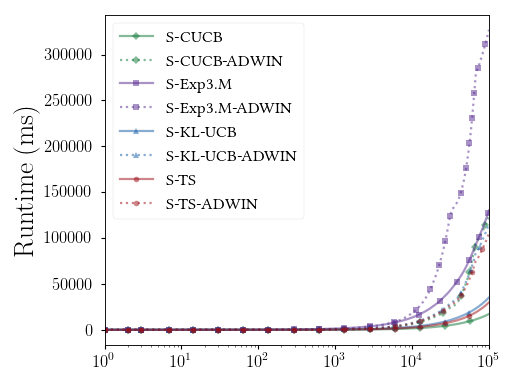

In [30]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime~(ms)}$")
    plt.legend()
plt.tight_layout()
plt.savefig("global_CumulativeRuntime.pdf")

# Extended analysis (with competitors)

In [31]:
plotkind = "long"

shortlist = [
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0'
]

prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-OS",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-dTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-dTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-dTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-dTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
     'MP-DTS; g=0.7': {'marker': 'p', 'color': blues5[0], 'linestyle': "-"},
     'MP-DTS; g=0.8': {'marker': 'p', 'color': blues5[1], 'linestyle': "-"},
     'MP-DTS; g=0.9': {'marker': 'p', 'color': blues5[2], 'linestyle': "-"},  
     'MP-DTS; g=0.99': {'marker': 'p', 'color': blues5[3], 'linestyle': "-"},
    
     'MP-EG; e=0.7': {'marker': 'P', 'color': purples5[0], 'linestyle': "-"},
     'MP-EG; e=0.8': {'marker': 'P', 'color': purples5[1], 'linestyle': "-"},
     'MP-EG; e=0.9': {'marker': 'P', 'color': purples5[2], 'linestyle': "-"},
     'MP-EG; e=0.99': {'marker': 'P', 'color': purples5[3], 'linestyle': "-"},

     'MP-SWUCB; w=50': {'marker': 's', 'color': greens5[0], 'linestyle': "-"},
     'MP-SWUCB; w=100': {'marker': 's', 'color': greens5[1], 'linestyle': "-"},
     'MP-SWUCB; w=500': {'marker': 's', 'color': greens5[2], 'linestyle': "-"},
     'MP-SWUCB; w=1000': {'marker': 's', 'color': greens5[3], 'linestyle': "-"},
     
    
     'MP-TS-ADWIN-0.001': {'marker': 'o', 'color': reds5[5], 'linestyle': "-"},
     'MP-TS-ADWIN-0.01': {'marker': 'o', 'color': reds5[4], 'linestyle': "-"},
     'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[3], 'linestyle': "-"},
     'MP-TS-ADWIN-0.3': {'marker': 'o', 'color': reds5[2], 'linestyle': "-"},
     'MP-TS-ADWIN-0.5': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
     'MP-TS-ADWIN-1.0': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    
     'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
     'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


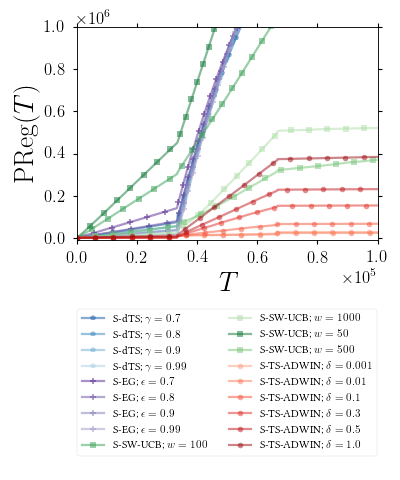

MP-DTS; g=0.7 : 1966113.25
MP-DTS; g=0.8 : 2185265.19
MP-DTS; g=0.9 : 2209341.1
MP-DTS; g=0.99 : 2175187.52
MP-EG; e=0.7 : 2358060.42
MP-EG; e=0.8 : 2269370.98
MP-EG; e=0.9 : 2207016.36
MP-EG; e=0.99 : 2163211.79
MP-SWUCB; w=100 : 1392072.09
MP-SWUCB; w=1000 : 521338.63
MP-SWUCB; w=50 : 2361847.59
MP-SWUCB; w=500 : 370456.12
MP-TS-ADWIN-0.001 : 27844.51
MP-TS-ADWIN-0.01 : 23697.3
MP-TS-ADWIN-0.1 : 66867.38
MP-TS-ADWIN-0.3 : 153724.64
MP-TS-ADWIN-0.5 : 231286.94
MP-TS-ADWIN-1.0 : 384073.57


In [32]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("global_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


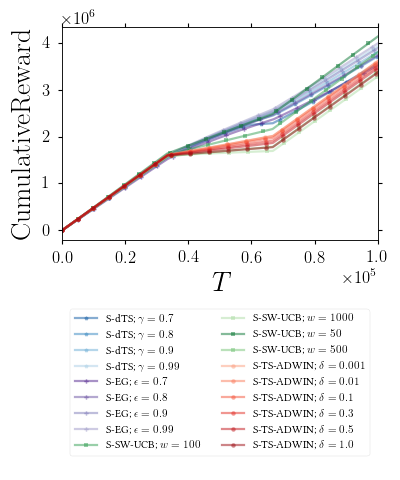

MP-DTS; g=0.7 : 3565267.13
MP-DTS; g=0.8 : 3715233.65
MP-DTS; g=0.9 : 3812145.53
MP-DTS; g=0.99 : 3927701.16
MP-EG; e=0.7 : 3521805.61
MP-EG; e=0.8 : 3734661.75
MP-EG; e=0.9 : 3887239.88
MP-EG; e=0.99 : 3989619.31
MP-SWUCB; w=100 : 3799361.7
MP-SWUCB; w=1000 : 3285578.33
MP-SWUCB; w=50 : 4135214.75
MP-SWUCB; w=500 : 3382089.86
MP-TS-ADWIN-0.001 : 3612283.69
MP-TS-ADWIN-0.01 : 3606243.26
MP-TS-ADWIN-0.1 : 3569303.3
MP-TS-ADWIN-0.3 : 3508922.78
MP-TS-ADWIN-0.5 : 3458324.61
MP-TS-ADWIN-1.0 : 3366032.08


In [33]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("global_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


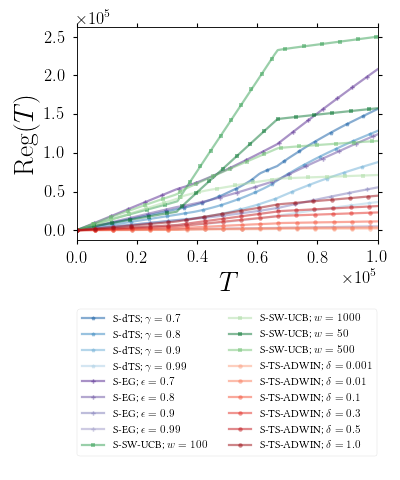

MP-DTS; g=0.7 : 156632.799514
MP-DTS; g=0.8 : 128380.662027
MP-DTS; g=0.9 : 87937.9223578
MP-DTS; g=0.99 : 36520.7130459
MP-EG; e=0.7 : 208001.569216
MP-EG; e=0.8 : 123932.651219
MP-EG; e=0.9 : 55427.9704781
MP-EG; e=0.99 : 5332.91374372
MP-SWUCB; w=100 : 250065.306663
MP-SWUCB; w=1000 : 71424.4838036
MP-SWUCB; w=50 : 157674.148558
MP-SWUCB; w=500 : 115379.653173
MP-TS-ADWIN-0.001 : 2314.38492855
MP-TS-ADWIN-0.01 : 3732.99568328
MP-TS-ADWIN-0.1 : 11515.3654011
MP-TS-ADWIN-0.3 : 23076.2891118
MP-TS-ADWIN-0.5 : 31324.399978
MP-TS-ADWIN-1.0 : 44701.5985452


In [34]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("global_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


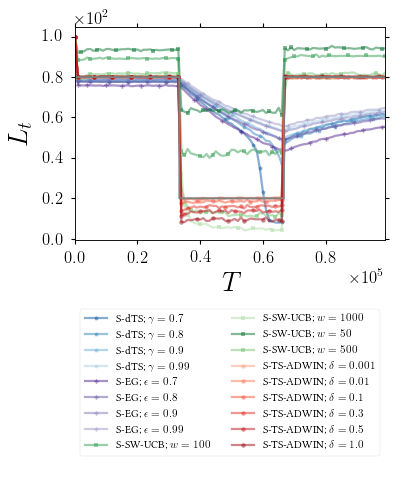

MP-DTS; g=0.7 : 61.40470930000008
MP-DTS; g=0.8 : 64.28834010000044
MP-DTS; g=0.9 : 65.93105339999988
MP-DTS; g=0.99 : 67.80674119999937
MP-EG; e=0.7 : 61.07749019999978
MP-EG; e=0.8 : 64.61482880000028
MP-EG; e=0.9 : 67.1322905999981
MP-EG; e=0.99 : 68.81544929999252
MP-SWUCB; w=100 : 73.8651328999996
MP-SWUCB; w=1000 : 55.69165930000157
MP-SWUCB; w=50 : 83.60671929999874
MP-SWUCB; w=500 : 58.6554058000008
MP-TS-ADWIN-0.001 : 60.10401750003199
MP-TS-ADWIN-0.01 : 60.01025580004039
MP-TS-ADWIN-0.1 : 59.46163400001416
MP-TS-ADWIN-0.3 : 58.59657879999831
MP-TS-ADWIN-0.5 : 57.8845079999955
MP-TS-ADWIN-1.0 : 56.65376469999897


In [35]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::1000]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("global_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


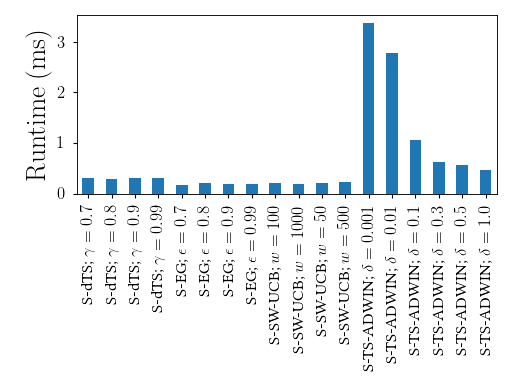

In [36]:
%matplotlib notebook

algs = [

 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=500',
 'MP-SWUCB; w=1000',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("global_Runtime_%s.pdf"%plotkind)

<IPython.core.display.Javascript object>


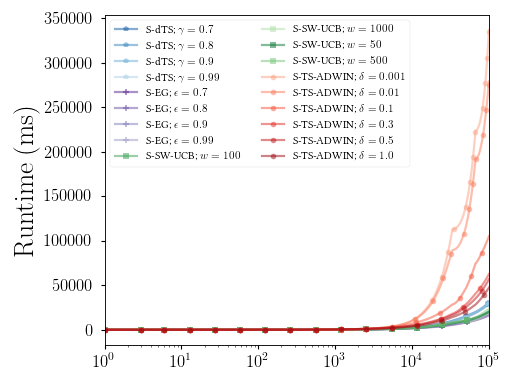

In [37]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime~(ms)}$")
    plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.savefig("global_Runtime_%s.pdf"%plotkind)